In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(23,)


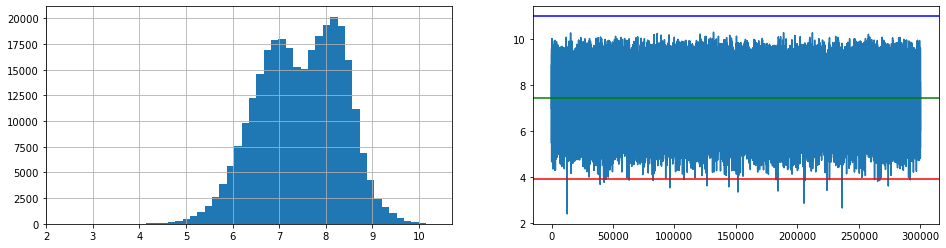

In [6]:
dataset = pd.read_csv('../input/tabular-playground-series-feb-2021/train.csv')

# Check null data --> There is no null data.
#print(dataset.isnull().sum())

# category variable
category = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']

# continuous variable
continuous = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 
              'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']

#outlier = [ 21248,  65710,  71166,  73335, 105049, 137574, 160168, 166042, 179361, 210708,
#           240385, 252761, 304677, 306931, 342537, 343575, 373500, 376977, 394279, 438005,
#           442278, 444922, 456587, 486120]
outlier = [166042]

for x in outlier:
    dataset = dataset.loc[dataset['id'] != x, :]

# One-Hot Encoding is better but for feature importance search,
# use LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in category:
    dataset[x] = encoder.fit_transform(dataset[x])

# dataset['target'].plot()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
dataset['target'].hist(bins=50, ax=axes[0])
dataset['target'].plot(ax=axes[1])

# Calculate Mean and Std value
target_mean = dataset.describe().loc['mean', 'target']
target_std = dataset.describe().loc['std', 'target']
axes[1].axhline(y=target_mean, color='g')
up = target_mean+4*target_std
low=target_mean-4*target_std

# Draw up and low lines
axes[1].axhline(y=up, color='b')
axes[1].axhline(y=low,color='r')

# histogram shows bimodal

outlier = dataset.loc[dataset['target'] < low, 'id'].values
print(outlier.shape)

#for x in outlier:
#    dataset = dataset[dataset['id'] != x]


In [ ]:
X = dataset.drop(columns=['id', 'target'])
y = dataset['target']

import xgboost as xgb
import shap

xgb_params= {
        "objective": "reg:squarederror",
        "max_depth": 6,
        "learning_rate": 0.01,
        "colsample_bytree": 0.4,
        "subsample": 0.6,
        "reg_alpha" : 6,
        "min_child_weight": 100,
        "n_jobs": 2,
        "seed": 2001,
        'tree_method': "gpu_hist"
    }


model = xgb.XGBRegressor(objective="reg:squarederror", max_depth=6, learning_rate=0.01,
                        subsample=0.6, reg_alpha=6, min_child_weight=100, n_jobs=-1, random_state=0)
model.fit(X,y)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model=model, feature_perturbation='tree_path_dependent', model_output='raw')
shap_values = explainer.shap_values(X=X)
shap.summary_plot(shap_values, X, plot_type='bar')
shap.summary_plot(shap_values, X)
#shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values, features=X)


In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
place_holder = dataset
for x in category:
    place_holder[x] = encoder.fit_transform(dataset[x].values)
correlation = dataset.corr()
sns.heatmap(correlation)

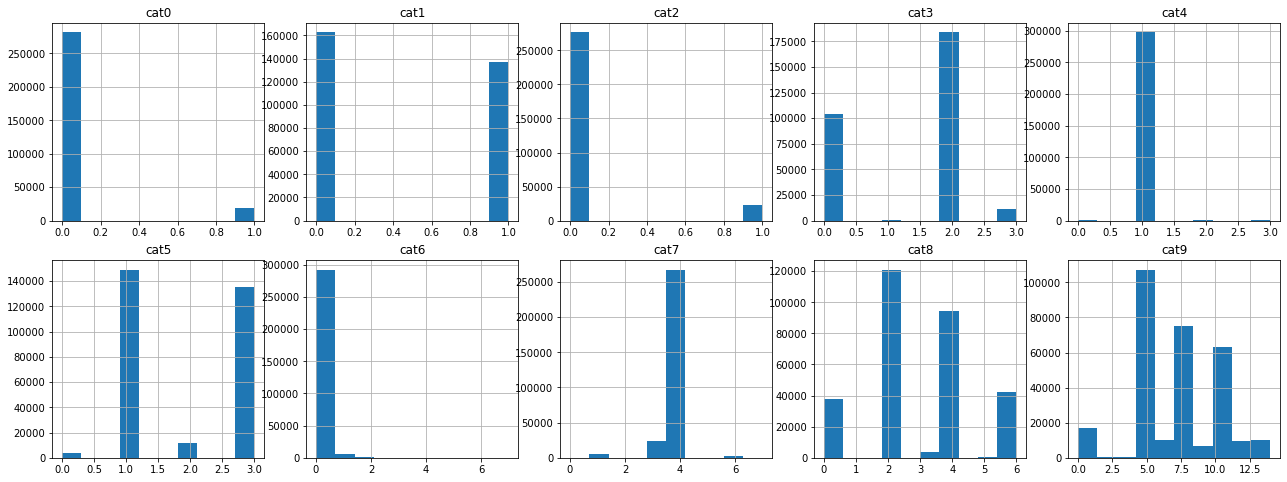

In [8]:
dataset = dataset[dataset['id'] != 166042]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22,8))
for i, x in enumerate(category):
    # 一列ごとに
    row = int(i/5)
    col = int(i%5)
    dataset[x].hist(ax=axes[row,col])
    axes[row, col].set_title(x)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

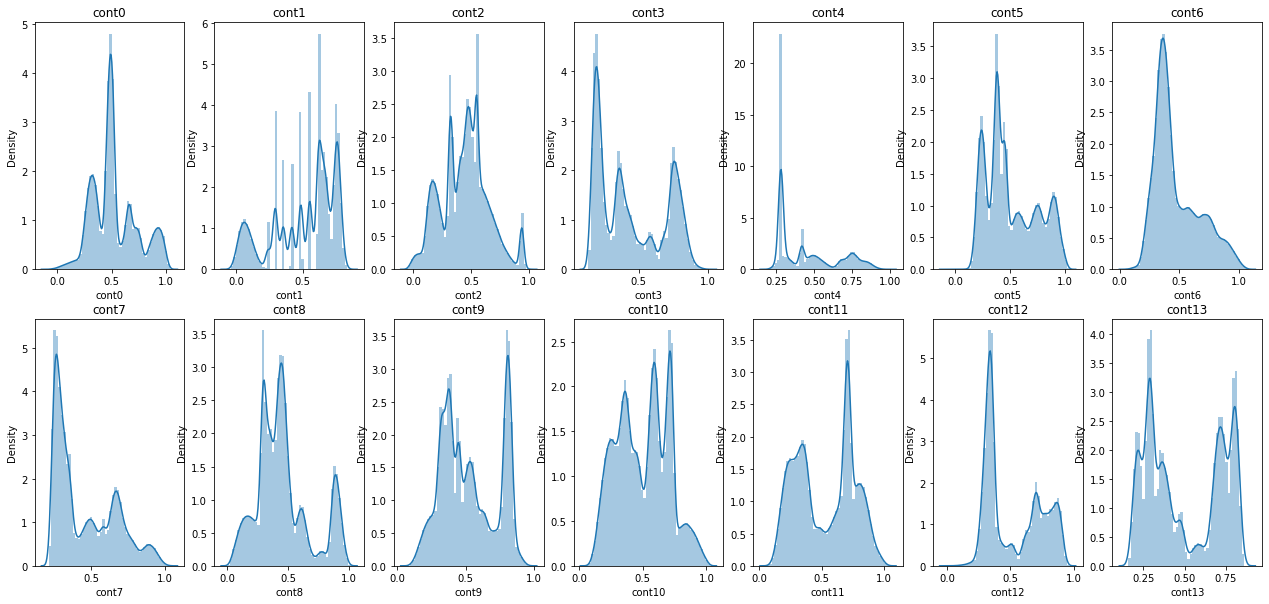

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(22,10))
skew_list = []
for i, x in enumerate(continuous):
    # 一列ごとに
    row = int(i/7)
    col = int(i%7)
    sns.distplot(dataset[x], ax=axes[row,col])
    #dataset[x].hist(ax=axes[row,col])
    axes[row,col].set_title(x)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,8))
for i, x in enumerate(continuous):
    # 一列ごとに
    row = int(i/7)
    col = int(i%7)
    dataset.plot.scatter(x=x, y='target',ax=axes[row,col])
    axes[row,col].set_title(x)

In [ ]:
features = ['cat1', 'cont11', 'cont13', 'cont0', 'cont2', 'cat8', 'cont8', 'cont9', 'cat3', 'cat6', 'cat5']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,8))
for i, x in enumerate(features):
    row = int(i/4)
    col = int(i%4)
    dataset[x].hist(ax=axes[row,col], bins=50)
    axes[row,col].set_title(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataset)
pca_result = pca.transform(dataset)

fig = plt.figure(figsize=(6,4))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.8)

In [ ]:
cluster_feat = ['cat1', 'cont11', 'cont13', 'cont0']
features_val = dataset.loc[:,cluster_feat]
n_components=4

def draw_cluster(features_val, pred):
    for i, x in enumerate(cluster_feat):
        fig = plt.figure(figsize=(5,4))
        dataA = features_val.loc[pred == 1, x]
        dataB = features_val.loc[pred == 0, x]
        plt.hist(dataA,bins=10)
        plt.hist(dataB, bins=10)

# Gaussian Mixture
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=n_components, random_state=0)
gm.fit(features_val)
pred = (gm.predict(features_val) > 0.1)*1
#draw_cluster(features_val, pred)

    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_components, random_state=0)
kmeans.fit(features_val)
pred = (kmeans.predict(features_val) > 0.1)*1
print(pred)
draw_cluster(features_val, pred)